In [252]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

In [217]:
bank = pd.read_csv('/Users/Bunny/Documents/Prasanthi/Springboard/Projects/Capstone 1 /Bank Marketing dataset/bank-additional/bank-additional-full.csv', delimiter = ';')

In [218]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [219]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [220]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [221]:
bank['y'] = (bank['y']=='yes').astype(int)

In [222]:
bank['y'].dtype

dtype('int64')

In [223]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [224]:
bank['education']=np.where(bank['education']=='basic.4y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.6y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.9y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='professional.course','Professional Course',bank['education'])
bank['education']=np.where(bank['education']=='university.degree','University Degree',bank['education'])
bank['education']=np.where(bank['education']=='unknown','Unknown',bank['education'])
bank['education']=np.where(bank['education']=='illiterate','No education',bank['education'])
bank['education']=np.where(bank['education']=='high.school','High School',bank['education'])

In [225]:
bank.education.unique()

array(['Basic', 'High School', 'Professional Course', 'Unknown',
       'University Degree', 'No education'], dtype=object)

In [226]:
bank.rename(columns ={'cons.conf.idx':'consumer_conf_idx','cons.price.idx':'consumer_price_idx','previous':'previous_calls','loan':'personal_loan','housing':'housing_loan','duration':'call_duration','default':'loan_default','campaign':'campaign_calls','contact':'contact_type'},inplace = True)

In [227]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'loan_default', 'housing_loan',
       'personal_loan', 'contact_type', 'month', 'day_of_week',
       'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'poutcome', 'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [228]:
y_dist = bank.groupby('y').size()/41188*100
y_dist

y
0    88.734583
1    11.265417
dtype: float64

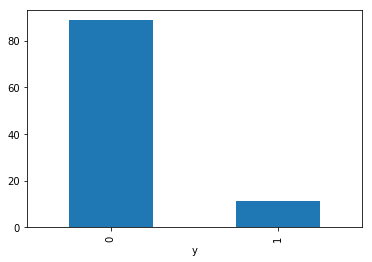

In [229]:
y_dist.plot(kind='bar')

In [230]:
bank.groupby(['y']).mean()

,age,call_duration,campaign_calls,pdays,previous_calls,emp.var.rate,consumer_price_idx,consumer_conf_idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


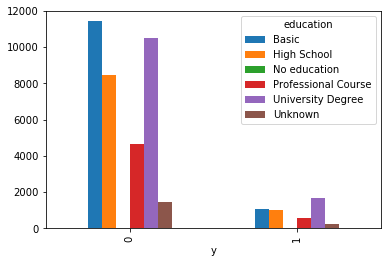

In [231]:
bank.groupby('y').education.value_counts().unstack('education').plot(kind='bar')

In [232]:
# % campaign conversions month wise
pd.crosstab(bank.y, bank.month, normalize='columns')#.plot(kind='bar')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,0.795213,0.893979,0.510989,0.909534,0.894885,0.494505,0.935653,0.898561,0.561281,0.550877
1,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


In [233]:
pd.crosstab(bank.y, bank.day_of_week, normalize='columns')

day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,0.891913,0.900517,0.878812,0.8822,0.883329
1,0.108087,0.099483,0.121188,0.1178,0.116671


## Creating dummy variables

In [234]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'loan_default', 'housing_loan',
       'personal_loan', 'contact_type', 'month', 'day_of_week',
       'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'poutcome', 'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [276]:
#Assigning dummy variables to categorical data with (k-1) dummies
bank_final = pd.get_dummies(bank,drop_first= True)
bank_final.head()

,age,call_duration,campaign_calls,pdays,previous_calls,emp.var.rate,consumer_price_idx,consumer_conf_idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [277]:
bank_final.columns

Index(['age', 'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_No education',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'loan_default_unknown', 'loan_default_yes',
       'housing_loan_unknown', 'housing_loan_yes', 'personal_loan_unknown',
       'personal_loan_yes', 'contact_type_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pou

In [280]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=[i for i in bank_final_vars if i not in Y ]
X1=bank_final[X]
Y1=bank_final[Y]

In [281]:
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
result.summary()

         Current function value: 0.207792
         Iterations: 35


/Users/Bunny/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41138
Method:                           MLE   Df Model:                           49
Date:                Sun, 21 May 2017   Pseudo R-squ.:                  0.4097
Time:                        00:46:54   Log-Likelihood:                -8558.5
converged:                      False   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
age                               0.0006      0.002      0.247      0.805        -0.004     0.005
call_duration                     0.0047   7.46e-05     63.140      0.000         0.005     0.005
campaign_calls                   -0.0404      0.012     -3.491      0.000        -0.063    -0.018
pdays                            -0.0010      0.000     -4.423      0.000        -0.001    -0.001
previous_calls                   -0.0554      0.059     -0.939      0.348        -0.171     0.060
emp.var.rate                     -1.0822      0.090    -12.003      0.000        -1.259    -0.905
consumer_price_idx                0.6560      0.042     15.489      0.000         0.573     0.739
consumer_conf_idx                -0.0099      0.006     -1.649      0.099        -0.022     0.002
euribor3m                         0.7948      0.107      7.411      0.000         0.585     1.005
nr.employed                      -0.0131      0.001    -15.514      0.000        -0.015    -0.011
job_blue-collar                  -0.2326      0.080     -2.911      0.004        -0.389    -0.076
job_entrepreneur                 -0.1663      0.126     -1.323      0.186        -0.413     0.080
job_housemaid                    -0.0384      0.146     -0.263      0.792        -0.324     0.248
job_management                   -0.0572      0.085     -0.671      0.502        -0.224     0.110
job_retired                       0.2815      0.106      2.654      0.008         0.074     0.489
job_self-employed                -0.1651      0.118     -1.403      0.161        -0.396     0.066
job_services                     -0.1419      0.086     -1.650      0.099        -0.310     0.027
job_student                       0.2100      0.111      1.888      0.059        -0.008     0.428
job_technician                   -0.0279      0.071     -0.393      0.694        -0.167     0.111
job_unemployed                    0.0077      0.128      0.061      0.952        -0.243     0.258
job_unknown                      -0.0741      0.239     -0.310      0.757        -0.542     0.394
marital_married                  -0.0026      0.068     -0.037      0.970        -0.137     0.132
marital_single                    0.0571      0.078      0.731      0.465        -0.096     0.210
marital_unknown                   0.0324      0.416      0.078      0.938        -0.783     0.848
education_High School             0.0258      0.069      0.373      0.709        -0.110     0.162
education_No education            1.0395      0.750      1.386      0.166        -0.431     2.510
education_Professional Course     0.0867      0.082      1.053      0.292        -0.075     0.248
education_University Degree       0.1646      0.070      2.358      0.018         0.028     0.301
education_Unknown                 0.1388      0.104      1.329      0.184        -0.066     0.344
loan_default_unknown             -0.2984      0.067     -4.436      0.000        -0.430    -0.167
loan_de